In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import impyute as impy
import statsmodels.api as sm
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from datetime import date
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [36]:
cleaned_dataset = pd.read_csv('my_cleaned_dataset.csv')


In [37]:
cleaned_dataset.tail(10)

,Unnamed: 0,continent,location,date,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
15051,116644,North America,United States,2021-10-23,26311.0,438.0,14961.0,1059610.0,0.052,220091872.0,763021.0,14335519.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15052,116645,North America,United States,2021-10-24,16315.0,152.0,14718.0,592006.0,0.052,220204012.0,437739.0,14588729.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15053,116646,North America,United States,2021-10-25,104829.0,1403.0,14912.0,866596.0,0.053,220516303.0,437739.0,15470456.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15054,116647,North America,United States,2021-10-26,79971.0,1539.0,14853.0,1171550.0,0.056,220816501.0,1359694.0,16363933.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15055,116648,North America,United States,2021-10-27,99694.0,2492.0,14700.0,1048707.0,0.063,221111334.0,1358113.0,17263827.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15056,116649,North America,United States,2021-10-28,78128.0,1776.0,14415.0,593828.0,0.063,221382705.0,1251085.0,18091032.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15057,116650,North America,United States,2021-10-29,97361.0,1656.0,12461.0,NaN,NaN,221657885.0,1246992.0,18903738.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15058,116651,North America,United States,2021-10-30,29302.0,291.0,12243.0,NaN,NaN,221749785.0,368732.0,19128756.0,56.02,332915074.0,35.608,151.089,10.79,0.926
15059,116652,North America,United States,2021-10-31,17599.0,164.0,12148.0,NaN,NaN,221760691.0,30005.0,19142081.0,NaN,332915074.0,35.608,151.089,10.79,0.926
15060,116653,North America,United States,2021-11-01,121139.0,1201.0,11927.0,NaN,NaN,221760691.0,0.0,19142081.0,NaN,332915074.0,35.608,151.089,10.79,0.926


In [38]:
cleaned_dataset.columns

Index(['Unnamed: 0', 'continent', 'location', 'date', 'new_cases',
       'new_deaths', 'icu_patients', 'new_tests', 'positive_rate',
       'people_vaccinated', 'new_vaccinations', 'total_boosters',
       'stringency_index', 'population', 'population_density',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'human_development_index'],
      dtype='object')

In [39]:
dataset = cleaned_dataset[["date", "location",'new_cases','stringency_index', "new_deaths",'icu_patients','people_vaccinated','positive_rate', 'new_vaccinations', 'new_tests' , 'total_boosters']]
# Merg: 'population', 'diabetes_prevalence','human_development_index', 'new_cases','icu_patients','people_vaccinated','stringency_index'
# Strica: population_density, 'cardiovasc_death_rate'
# Nu merg: 'new_vaccinations', 'new_tests' , 'total_boosters'

dataset['location'] = dataset['location'].astype('category')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.index = pd.to_datetime(dataset.date)
dataset.index.freq = dataset.index.inferred_freq
# dataset['date'] = dataset['date'].dt.strftime('%d.%m.%Y')
# dataset['year'] = pd.DatetimeIndex(dataset['date']).year
# dataset['month'] = pd.DatetimeIndex(dataset['date']).month
# dataset['day'] = pd.DatetimeIndex(dataset['date']).day
# dataset.set_index('date', inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15061 entries, 2020-02-25 to 2021-11-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               15061 non-null  datetime64[ns]
 1   location           15061 non-null  category      
 2   new_cases          14941 non-null  float64       
 3   stringency_index   14927 non-null  float64       
 4   new_deaths         14389 non-null  float64       
 5   icu_patients       13941 non-null  float64       
 6   people_vaccinated  7273 non-null   float64       
 7   positive_rate      13327 non-null  float64       
 8   new_vaccinations   6749 non-null   float64       
 9   new_tests          12054 non-null  float64       
 10  total_boosters     1851 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(9)
memory usage: 1.3 MB


C:\Users\User\AppData\Local\Temp/ipykernel_20272/3163223831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['location'] = dataset['location'].astype('category')
C:\Users\User\AppData\Local\Temp/ipykernel_20272/3163223831.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'])


In [40]:
# take non-numerical variables
non_numerical_variables = [
    'location',
    'date'
]

numerical_variables = [
'new_cases','stringency_index', "new_deaths",'icu_patients','people_vaccinated','positive_rate', 'new_vaccinations', 'new_tests' , 'total_boosters'
]

cleaned_dataset = dataset.copy()

obj_dataset = cleaned_dataset[non_numerical_variables].copy()
num_dataset = cleaned_dataset[numerical_variables].copy()

num_dataset = pd.DataFrame(num_dataset, columns=numerical_variables)


num_dataset = np.log(num_dataset)
num_dataset = num_dataset.diff()
num_dataset = num_dataset.diff()

cleaned_dataset = pd.concat([obj_dataset, pd.DataFrame(data=num_dataset, columns=numerical_variables)], axis=1)

In [41]:
def replace_nans(dataset):
    # for each country
    new_dataset = pd.DataFrame()

    for country in dataset['location'].unique():
        country_dataset = dataset[dataset['location'] == country]

        for variable in numerical_variables:
            for index, row in country_dataset.iterrows():
                if pd.isna(row[variable]) or row[variable] == float('inf') or row[variable] == float('-inf'):
                    previous_timestamp = index - pd.Timedelta(days=1)
                    if previous_timestamp in country_dataset.index and pd.isna(country_dataset.loc[previous_timestamp, variable]) == False:
                        country_dataset.at[index, variable] = country_dataset.at[previous_timestamp, variable]
                    else:
                        country_dataset.at[index, variable] = 0
    
        new_dataset = pd.concat([new_dataset, country_dataset], axis=0)

    return new_dataset

cleaned_dataset= replace_nans(cleaned_dataset)

In [ ]:
is_NaN = cleaned_dataset.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cleaned_dataset[row_has_NaN]

print(rows_with_NaN.shape)

(0, 11)


In [ ]:
for variable in numerical_variables:
    if variable == 'new_deaths':
        cleaned_dataset['new_deaths_lag1'] = cleaned_dataset['new_deaths'].shift(1)
        cleaned_dataset['new_deaths_lag2'] = cleaned_dataset['new_deaths'].shift(2)
    else:
        cleaned_dataset[variable + '_0'] = cleaned_dataset[variable].shift(1)
    cleaned_dataset = cleaned_dataset.dropna()

cleaned_dataset.head(50)

,location,date,new_cases,stringency_index,new_deaths,icu_patients,people_vaccinated,positive_rate,new_vaccinations,new_tests,...,new_cases_0,stringency_index_0,new_deaths_lag1,new_deaths_lag2,icu_patients_0,people_vaccinated_0,positive_rate_0,new_vaccinations_0,new_tests_0,total_boosters_0
date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,Austria,2020-03-06,-0.251314,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-0.575364,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-07,Austria,2020-03-07,0.384846,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-0.251314,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-08,Austria,2020-03-08,-0.498175,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.384846,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-09,Austria,2020-03-09,0.036139,0.559487,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-0.498175,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-10,Austria,2020-03-10,0.559028,-0.559487,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.036139,0.559487,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-11,Austria,2020-03-11,-0.408931,0.452359,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.559028,-0.559487,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-12,Austria,2020-03-12,-0.360589,-0.338073,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-0.408931,0.452359,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-13,Austria,2020-03-13,1.416447,0.226056,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,-0.360589,-0.338073,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2020-03-14,Austria,2020-03-14,-1.573904,-0.340343,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.416447,0.226056,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
cleaned_dataset.shape

(15051, 21)

In [ ]:
is_NaN = cleaned_dataset.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cleaned_dataset[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [location, date, new_cases, stringency_index, new_deaths, icu_patients, people_vaccinated, positive_rate, new_vaccinations, new_tests, total_boosters, new_cases_0, stringency_index_0, new_deaths_lag1, new_deaths_lag2, icu_patients_0, people_vaccinated_0, positive_rate_0, new_vaccinations_0, new_tests_0, total_boosters_0]
Index: []

[0 rows x 21 columns]


In [ ]:
cleaned_dataset = cleaned_dataset[cleaned_dataset["location"] != 'Ireland']
cleaned_dataset = cleaned_dataset[cleaned_dataset["location"] != 'Malta']
cleaned_dataset = cleaned_dataset[cleaned_dataset["location"] != 'Luxembourg']

dummies = pd.get_dummies(cleaned_dataset.location)
cleaned_dataset = pd.concat([cleaned_dataset, dummies], axis = 1)
cleaned_dataset.drop_duplicates(inplace = True)
countries = cleaned_dataset['location'].unique()

cleaned_dataset = cleaned_dataset.drop(columns=['location', 'new_cases', 'stringency_index', 'icu_patients',
       'people_vaccinated', 'positive_rate', 'new_vaccinations', 'new_tests',
       'total_boosters'])
cleaned_dataset.columns

Index(['date', 'new_deaths', 'new_cases_0', 'stringency_index_0',
       'new_deaths_lag1', 'new_deaths_lag2', 'icu_patients_0',
       'people_vaccinated_0', 'positive_rate_0', 'new_vaccinations_0',
       'new_tests_0', 'total_boosters_0', 'Austria', 'Belgium', 'Bulgaria',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Malta', 'Netherlands',
       'Portugal', 'Romania', 'Serbia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States'],
      dtype='object')

In [ ]:

# split into train and test
training_date_limit = date(2021, 10, 1)

cleaned_dataset.index = pd.to_datetime(cleaned_dataset.date)
cleaned_dataset.index.freq = cleaned_dataset.index.inferred_freq

train_dataset = cleaned_dataset[cleaned_dataset['date'].dt.date < training_date_limit]
test_dataset = cleaned_dataset[cleaned_dataset['date'].dt.date >= training_date_limit]

xboost_train_dataset = train_dataset.copy()
xboost_test_dataset = test_dataset.copy()

lightgbm_train_dataset = train_dataset.copy()
lightgbm_test_dataset = test_dataset.copy()

In [ ]:
numerical_variables_with_lags = cleaned_dataset.columns.tolist()
numerical_variables_with_lags = [x for x in numerical_variables_with_lags if x not in ['continent', 'location','date']]

In [ ]:
def random_forest_regression(country):
    best_score = -np.Infinity
    best_n_estimators = 3
    best_rfr_model = None

    # X = train_dataset[numerical_variables_with_lags].loc[train_dataset['location'] == country]
    X = train_dataset[numerical_variables_with_lags]
    X = X.drop(columns=['new_deaths'])
    # y = train_dataset['new_deaths'].loc[train_dataset['location'] == country]
    y = train_dataset['new_deaths']


    # show score
    X_test = test_dataset[numerical_variables_with_lags].loc[test_dataset[country] == 1]
    # X_test = test_dataset[numerical_variables_with_lags]
    # remove new_deaths from X_test
    X_test = X_test.drop(columns=['new_deaths'])
    y_test = test_dataset['new_deaths'].loc[test_dataset[country] == 1]
    # y_test = test_dataset['new_deaths']

    n_estimators = 3
    while n_estimators < 50:
        rfr = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        rfr.fit(X, y)

        score = rfr.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_n_estimators = n_estimators
            best_rfr_model = rfr
        n_estimators = n_estimators + 1

    print("Country: {} Estimator number: {} - Random Forest Regression model Score: {}".format( country, best_n_estimators, best_score))

    predictions = best_rfr_model.predict(X_test)

    new_index = y_test.index
    predictions = pd.Series(predictions)
    predictions.index = new_index

    # plot predictions vs actual
    plt.xlabel("Date")
    plt.ylabel("New Deaths")

    ax1 = y_test.plot(color='blue', grid=True, label='Expected')
    ax2 = predictions.plot(color='red', grid=True,  label='Predicted')


    plt.legend()
    plt.show()

    return predictions

Country: Austria Estimator number: 37 - Random Forest Regression model Score: 0.3189972756990669


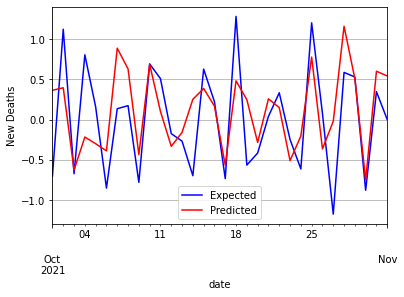

Country: Belgium Estimator number: 26 - Random Forest Regression model Score: -0.3023497151374728


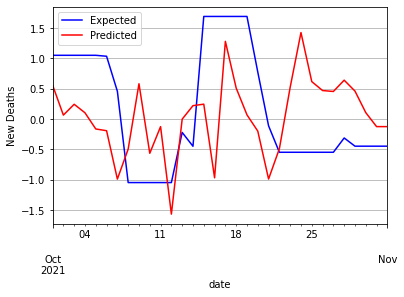

Country: Bulgaria Estimator number: 7 - Random Forest Regression model Score: 0.5968668319485724


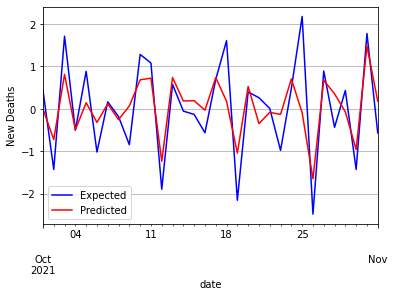

Country: Cyprus Estimator number: 31 - Random Forest Regression model Score: 0.6228304647696822


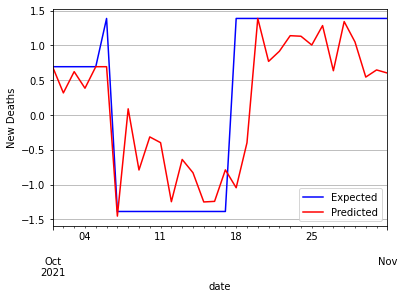

Country: Czechia Estimator number: 40 - Random Forest Regression model Score: 0.3362772911079165


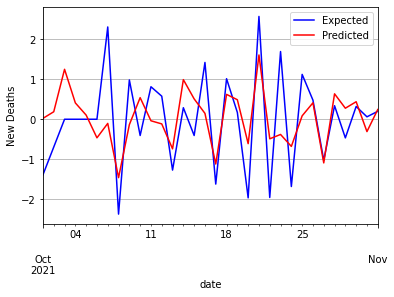

Country: Denmark Estimator number: 3 - Random Forest Regression model Score: 0.24889420352883496


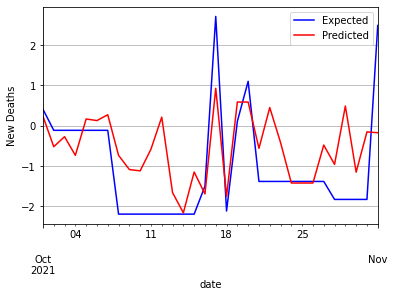

Country: Estonia Estimator number: 6 - Random Forest Regression model Score: 0.5155279895593438


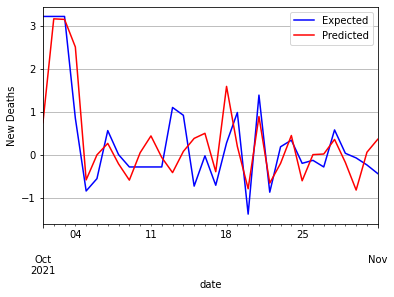

Country: Finland Estimator number: 47 - Random Forest Regression model Score: -0.05121140687424264


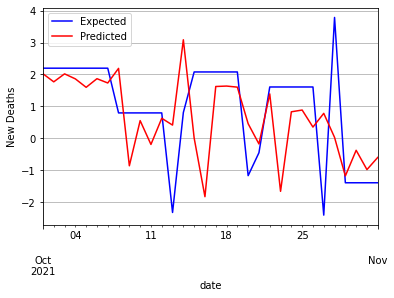

Country: France Estimator number: 7 - Random Forest Regression model Score: 0.6176272908479542


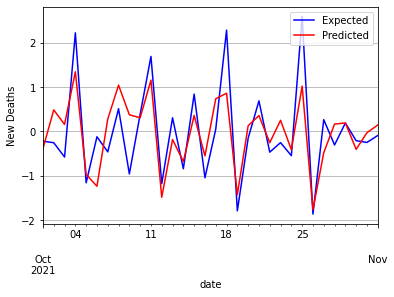

Country: Germany Estimator number: 46 - Random Forest Regression model Score: 0.3482562668560406


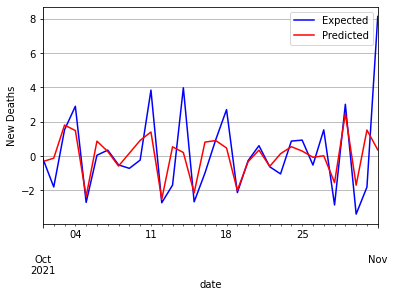

KeyboardInterrupt: 

In [ ]:
for country in countries:
    random_forest_predictions = random_forest_regression(country)


In [ ]:
# Cross-validation
# country_dummies = ['l__Austria', 'l__Belgium', 'l__Bulgaria', 'l__Cyprus', 'l__Czechia',
#        'l__Denmark', 'l__Estonia', 'l__Finland', 'l__France', 'l__Germany',
#        'l__Ireland', 'l__Italy', 'l__Luxembourg', 'l__Malta', 'l__Netherlands',
#        'l__Portugal', 'l__Romania', 'l__Serbia', 'l__Slovenia', 'l__Spain',
#        'l__Sweden', 'l__Switzerland', 'l__United Kingdom', 'l__United States']
# predictors = ['date', 'new_cases', 'icu_patients', 'positive_rate', 'people_vaccinated', 'stringency_index', 'population', 'diabetes_prevalence', 'human_development_index', 'new_cases_0', 'new_deaths_lag1', 'new_deaths_lag2', 'icu_patients_0', 'positive_rate_0', 'people_vaccinated_0', 'stringency_index_0', 'population_0', 'diabetes_prevalence_0', 'human_development_index_0']
# countries = cleaned_dataset['location'].unique()
# n_splits = 10

# for country in countries:
#     dataset = pd.DataFrame()
#     dataset = cleaned_dataset[cleaned_dataset['location'] == country]
#     dummy_country = 'l_' + country
#     dataset[dummy_country] = cleaned_dataset[dummy_country]
    
# dataset

# to iterate for every country for more dataset split number


# for i in range(0,10):
#         country_dummy = 'l_'+ country
#         n_samples = cleaned_dataset[country_dummy].shape[0]
#         training_size = i * n_samples / (n_splits + 1) + n_samples % (n_splits + 1)
#         test_size = n_samples / (n_splits + 1)
#         dataset = cleaned_dataset[[country_dummy], predictors ]
    # dataset.append(cleaned_dataset[predictors])


XBoost

In [ ]:

def x_boost_model(country):
    best_score = -np.Infinity
    best_n_estimators = 3
    best_rfr_model = None

    X = xboost_train_dataset[numerical_variables_with_lags]
    X = X.drop(columns=['new_deaths'])
    y = xboost_train_dataset['new_deaths']


    # show score
    X_test = xboost_test_dataset[numerical_variables_with_lags].loc[xboost_test_dataset[country] == 1]
    # remove new_deaths from X_test
    X_test = X_test.drop(columns=['new_deaths'])
    y_test = xboost_test_dataset['new_deaths'].loc[xboost_test_dataset[country] == 1]

    
    model = XGBRegressor()
    model.fit(X, y)

    score = model.score(X_test, y_test)

    print("Country: {}  X Boost model Score: {}".format( country, score))

    predictions = model.predict(X_test)

    new_index = y_test.index
    predictions = pd.Series(predictions)
    predictions.index = new_index

    # plot predictions vs actual
    plt.xlabel("Date")
    plt.ylabel("New Deaths")

    ax1 = y_test.plot(color='blue', grid=True, label='Expected')
    ax2 = predictions.plot(color='red', grid=True,  label='Predicted')


    plt.legend()
    plt.show()

    return predictions

Country: Austria  X Boost model Score: -0.08088653898543696


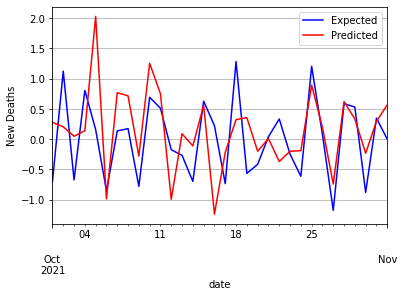

Country: Belgium  X Boost model Score: -0.4215714976903018


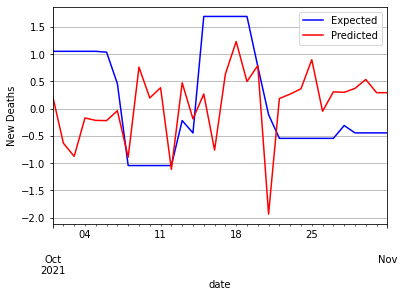

Country: Bulgaria  X Boost model Score: 0.5820517198545967


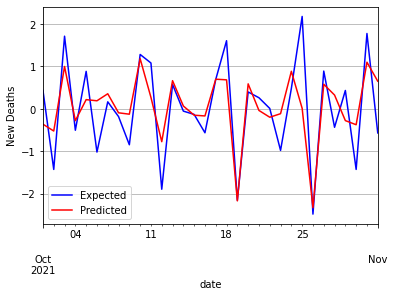

Country: Cyprus  X Boost model Score: 0.62136772293652


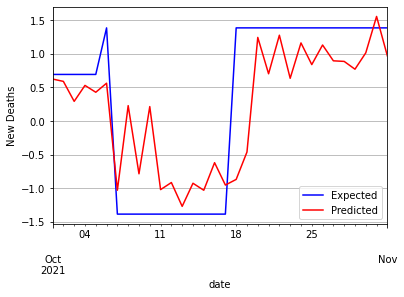

Country: Czechia  X Boost model Score: 0.25970361084782


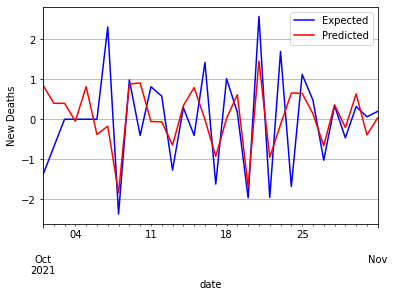

Country: Denmark  X Boost model Score: 0.08480901732691815


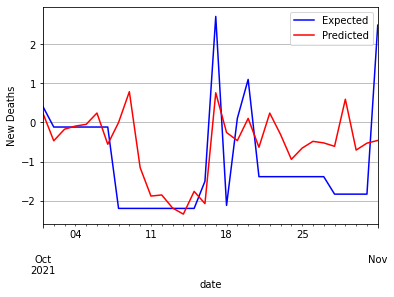

Country: Estonia  X Boost model Score: 0.19554214824134974


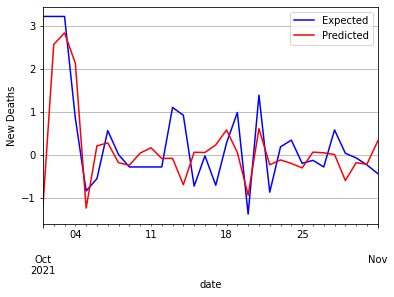

Country: Finland  X Boost model Score: -0.06884556081678528


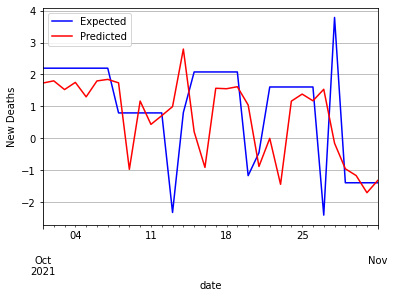

Country: France  X Boost model Score: 0.433239320605436


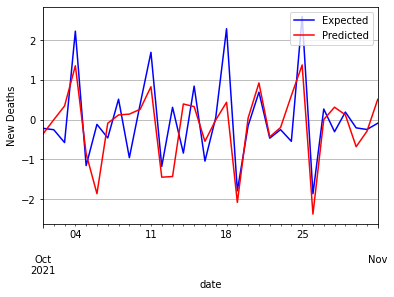

Country: Germany  X Boost model Score: 0.4951011776711288


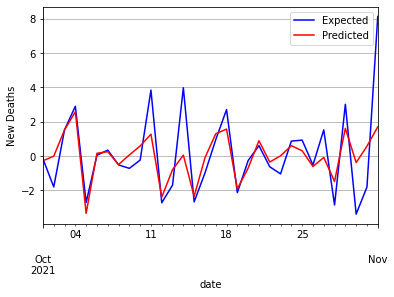

Country: Italy  X Boost model Score: 0.40472936931669345


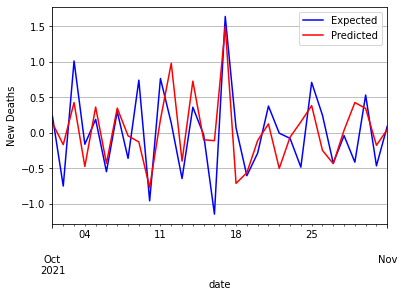

Country: Netherlands  X Boost model Score: 0.35876343583992676


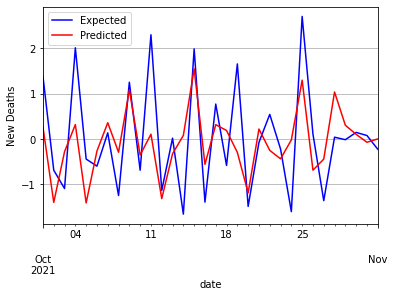

Country: Portugal  X Boost model Score: 0.308194276693348


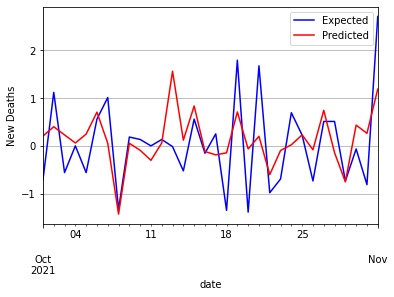

Country: Romania  X Boost model Score: 0.14146953621834002


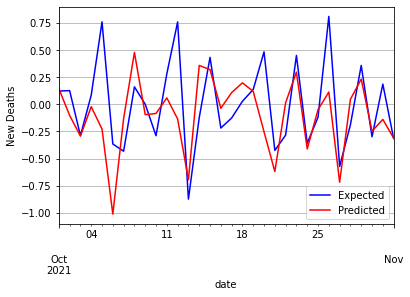

Country: Serbia  X Boost model Score: -1.5277112215407227


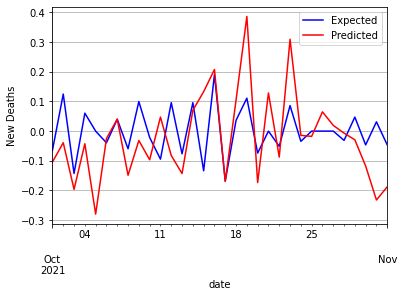

Country: Slovenia  X Boost model Score: 0.3441716752177073


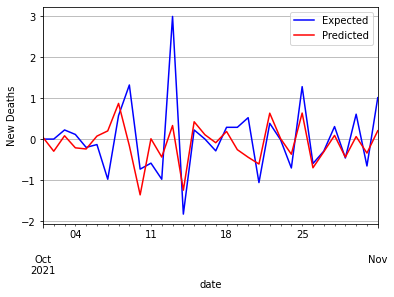

Country: Spain  X Boost model Score: -0.45083916900807863


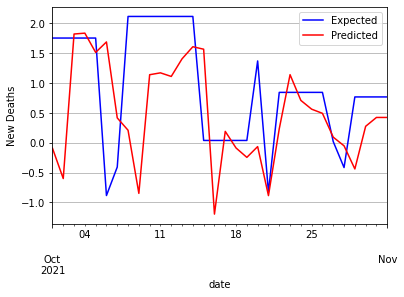

Country: Sweden  X Boost model Score: 0.39680356992292265


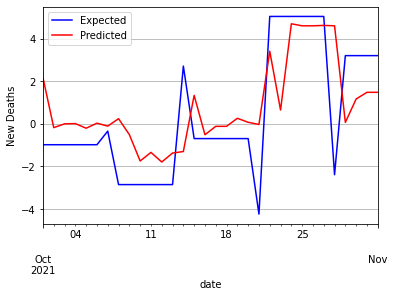

Country: Switzerland  X Boost model Score: 0.347563308620066


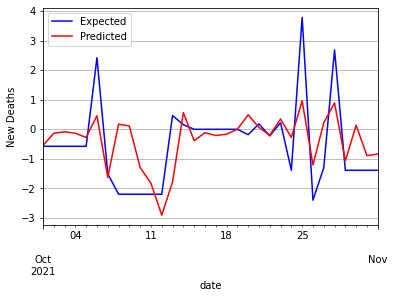

Country: United Kingdom  X Boost model Score: 0.5733866245095838


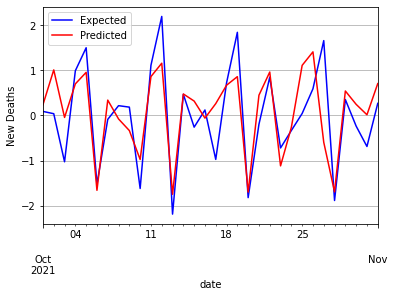

Country: United States  X Boost model Score: 0.5733018350933781


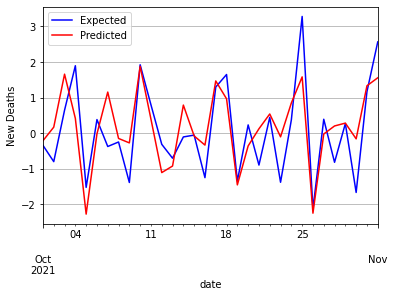

In [ ]:
for country in countries:
    random_forest_predictions = x_boost_model(country)

Light GBM

In [ ]:
def lightgbm_model(country):


    X = lightgbm_train_dataset[numerical_variables_with_lags]
    X = X.drop(columns=['new_deaths'])
    y = lightgbm_train_dataset['new_deaths']


    # show score
    X_test = lightgbm_test_dataset[numerical_variables_with_lags].loc[lightgbm_test_dataset[country] == 1]
    # remove new_deaths from X_test
    X_test = X_test.drop(columns=['new_deaths'])
    y_test = lightgbm_test_dataset['new_deaths'].loc[lightgbm_test_dataset[country] == 1]

    
    model = LGBMRegressor(boosting_type='goss', max_depth=4)
    model.fit(X, y)

    score = model.score(X_test, y_test)

    print("Country: {}  LGBM Regressor model Score: {}".format( country, score))

    predictions = model.predict(X_test)

    new_index = y_test.index
    predictions = pd.Series(predictions)
    predictions.index = new_index

    # plot predictions vs actual
    plt.xlabel("Date")
    plt.ylabel("New Deaths")

    ax1 = y_test.plot(color='blue', grid=True, label='Expected')
    ax2 = predictions.plot(color='red', grid=True,  label='Predicted')


    plt.legend()
    plt.show()

    return predictions

Country: Austria  LGBM Regressor model Score: 0.3600575092537842


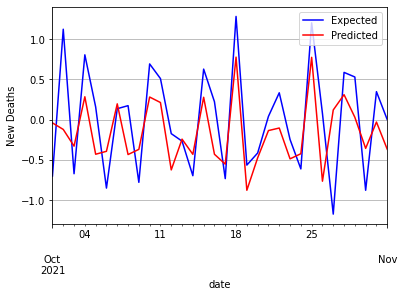

Country: Belgium  LGBM Regressor model Score: -0.11680306393245221


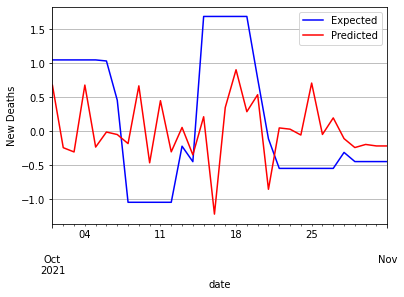

Country: Bulgaria  LGBM Regressor model Score: 0.4915013020468394


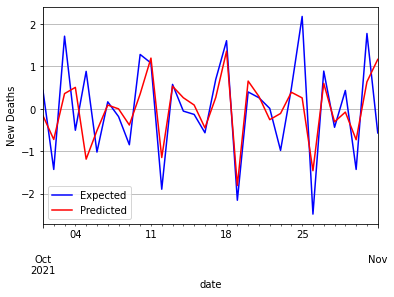

Country: Cyprus  LGBM Regressor model Score: 0.5938454345787181


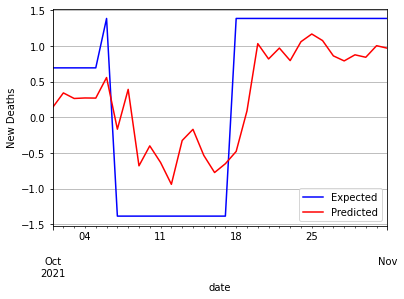

Country: Czechia  LGBM Regressor model Score: 0.3704317258428641


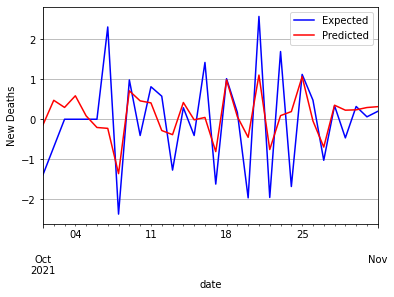

Country: Denmark  LGBM Regressor model Score: -0.08022902407521415


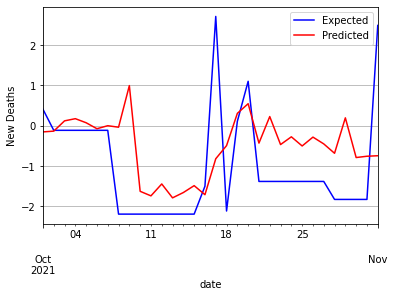

Country: Estonia  LGBM Regressor model Score: 0.18882372036070416


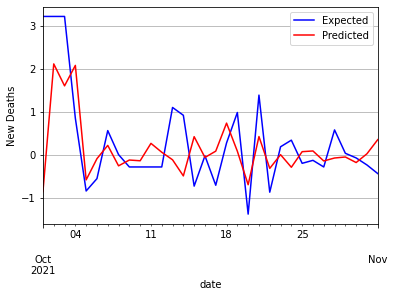

Country: Finland  LGBM Regressor model Score: 0.13520191980662122


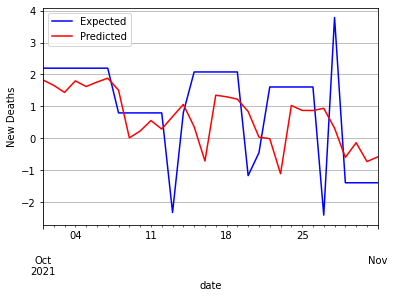

Country: France  LGBM Regressor model Score: 0.7074118820305577


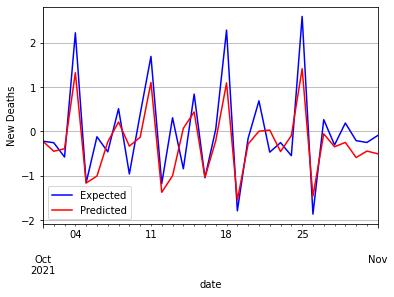

Country: Germany  LGBM Regressor model Score: 0.08018523212798045


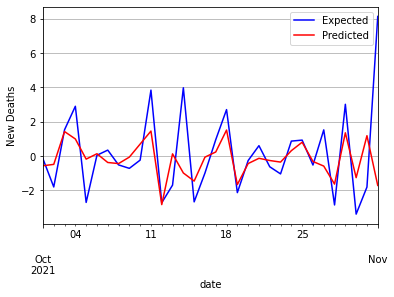

Country: Italy  LGBM Regressor model Score: 0.44639939471695067


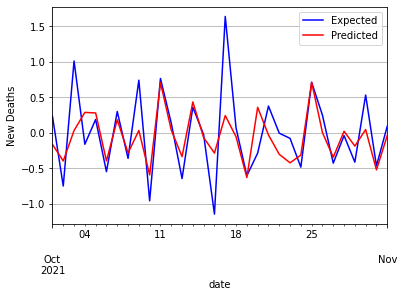

Country: Netherlands  LGBM Regressor model Score: 0.41809260891338096


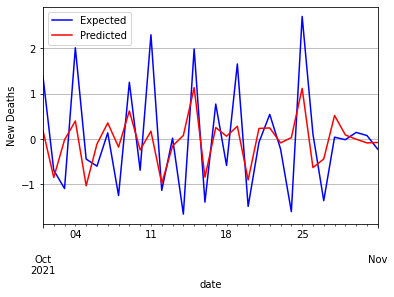

Country: Portugal  LGBM Regressor model Score: 0.32328134816666465


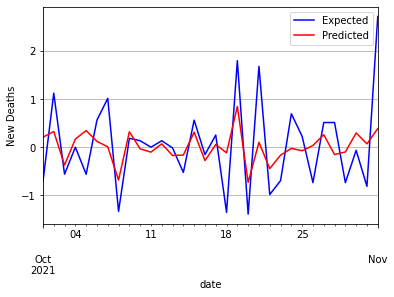

Country: Romania  LGBM Regressor model Score: -0.06002313228413936


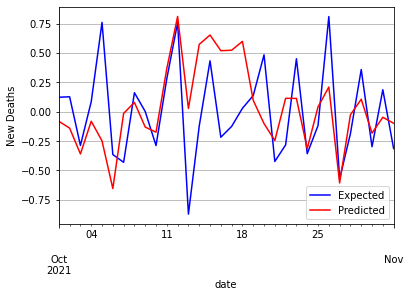

Country: Serbia  LGBM Regressor model Score: -2.1666553556920918


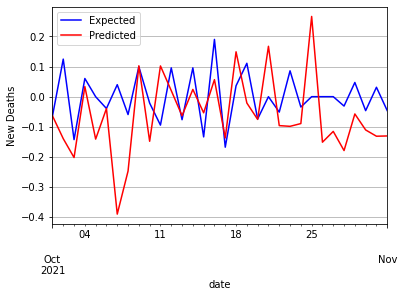

Country: Slovenia  LGBM Regressor model Score: 0.15561058121306193


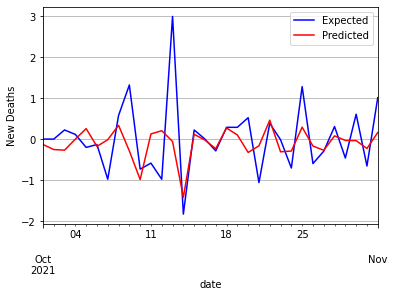

Country: Spain  LGBM Regressor model Score: -0.4609522311894114


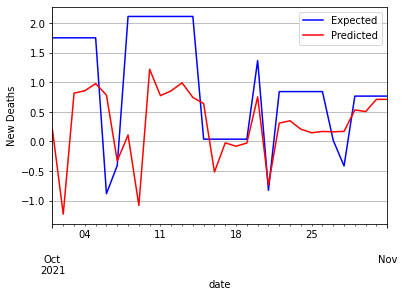

Country: Sweden  LGBM Regressor model Score: 0.29946372402552035


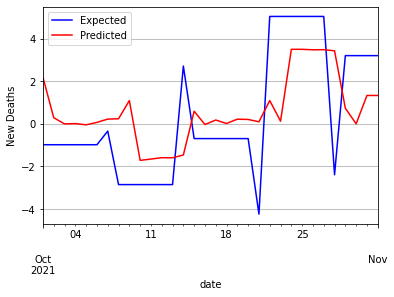

Country: Switzerland  LGBM Regressor model Score: 0.24851304600218616


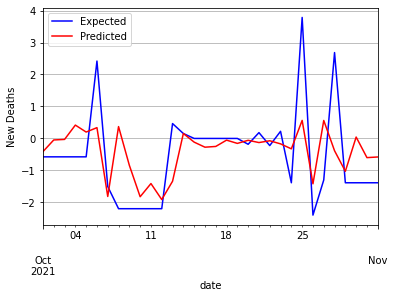

Country: United Kingdom  LGBM Regressor model Score: 0.26151237850132736


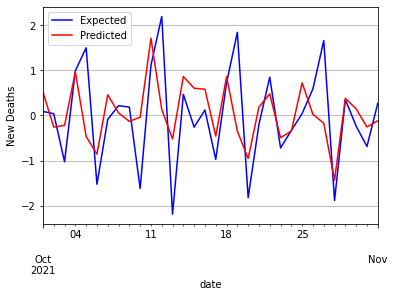

Country: United States  LGBM Regressor model Score: 0.6255039697169682


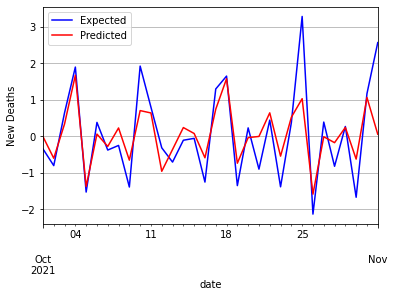

In [ ]:
for country in countries:
    lgbm_regressor_predictions = lightgbm_model(country)